<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r10_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r10/4-fft-normal-n-0-6-9-15-r10.csv?token=AKVFSOFX3UYBF2V6Y2GTTES64IDM4')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r10/4-fft-malicious-n-0-6-9-15-m-1-11-r10.csv?token=AKVFSOEQ57KIUGIDDL3PSEC64IDLC')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,9,9,23,7,3,3,1,0.333333,8,57,1,57,57,8,12,3,27,1
1,11,2,4,1,1,4,3,9,9,9,23,7,4,3,1,0.333333,8,70,1,70,70,8,16,3,27,0
2,102,4,2,1,1,4,3,9,11,11,24,8,8,3,1,0.333333,8,69,2,70,138,8,32,3,27,0
3,134,3,4,4,1,1,5,17,24,8,6,6,7,3,2,0.666667,12,68,3,70,204,12,28,20,340,0
4,134,3,4,4,1,1,5,17,24,8,6,6,5,3,2,0.666667,12,56,2,57,112,12,20,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221101,3279285,4,2,6,2,2,3,9,27,11,24,8,60219,3,1,0.333333,15,5,8,12,40,8,1445256,18,162,0
221102,3279292,4,2,6,3,2,3,9,27,11,24,8,60219,3,1,0.333333,22,4,9,12,36,8,2167884,18,162,0
221103,3279299,4,2,6,4,2,3,9,27,11,24,8,60219,3,1,0.333333,29,3,10,12,30,8,2890512,18,162,0
221104,3279306,4,2,6,5,3,3,9,27,11,24,8,60219,3,1,0.333333,36,2,11,12,22,8,5419710,18,162,0


In [6]:
df.shape

(221106, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r10/4-fft-malicious-n-0-6-9-15-m-1-12-r10.csv?token=AKVFSOFSBMO5VTREN4OLTLK64IDLG')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r10/4-fft-malicious-n-0-6-9-15-m-1-7-r10.csv?token=AKVFSOEF4XA5WNRC7LC3N2K64IDLM')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r10/4-fft-malicious-n-0-6-9-15-m-11-12-r10.csv?token=AKVFSOC5GRVHDVGK4QBU7MS64IDLO')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r10/4-fft-malicious-n-0-6-9-15-m-7-11-r10.csv?token=AKVFSOGZ3FY6NUK67TUVDZ264IDLU')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r10/4-fft-malicious-n-0-6-9-15-m-7-12-r10.csv?token=AKVFSODYX7XNLDYEDSHMVV264IDLY')

In [8]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(119314, 26)
(117738, 26)
(138110, 26)
(135976, 26)
(119937, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.500502,0.149283,0.049792,-0.075158,0.206585,0.247805,0.035802,0.205320,-0.526586,-0.763078,-0.229736,-0.043781,0.006832,-0.027779,-0.032184,0.410905,0.065264,0.280217,0.286371,-0.041267
inport,-0.500502,1.000000,-0.241814,0.030705,-0.046348,0.206737,0.134246,-0.026258,0.182005,0.490224,0.501854,0.021899,-0.038864,-0.027701,-0.050045,-0.049819,0.524140,-0.071345,-0.045945,0.078805,0.047341
cache_coherence_type,0.149283,-0.241814,1.000000,0.264757,-0.399635,-0.209850,-0.219104,0.033246,-0.079223,-0.174929,-0.202393,-0.210935,0.028864,-0.007248,0.016251,0.021226,-0.125370,0.300515,0.676124,0.166879,0.004845
flit_id,0.049792,0.030705,0.264757,1.000000,-0.027290,0.199199,0.173489,0.003765,0.044172,0.013687,-0.008183,0.392917,-0.018442,0.013056,-0.004049,-0.003632,0.084854,0.646641,0.370986,0.288801,-0.001606
flit_type,-0.075158,-0.046348,-0.399635,-0.027290,1.000000,-0.300680,-0.261871,-0.005683,-0.066675,-0.020659,0.012352,0.392299,-0.021973,0.030970,0.006764,0.006594,-0.128082,0.122329,-0.559981,-0.435928,0.002424
vnet,0.206585,0.206737,-0.209850,0.199199,-0.300680,1.000000,0.984285,-0.019297,0.204546,0.139386,0.058922,-0.424301,-0.038478,0.018774,-0.014814,-0.023236,0.446176,-0.035171,0.578498,0.924202,0.042909
vc,0.247805,0.134246,-0.219104,0.173489,-0.261871,0.984285,1.000000,-0.016197,0.175388,0.078617,-0.006506,-0.409234,-0.032016,0.031239,-0.000584,-0.009458,0.396825,-0.041572,0.558935,0.921583,0.041795
traversal_id,0.035802,-0.026258,0.033246,0.003765,-0.005683,-0.019297,-0.016197,1.000000,0.008548,-0.005685,-0.011914,0.020735,0.142488,0.143460,0.214982,0.148284,0.008898,0.549171,0.013194,-0.005833,-0.304348
hop_count,0.205320,0.182005,-0.079223,0.044172,-0.066675,0.204546,0.175388,0.008548,1.000000,0.397041,-0.210457,0.021903,-0.075447,-0.042403,-0.088602,-0.081453,0.399617,-0.010357,0.088047,0.160523,-0.028948
current_hop,-0.526586,0.490224,-0.174929,0.013687,-0.020659,0.139386,0.078617,-0.005685,0.397041,1.000000,0.723401,0.202499,-0.012937,-0.020810,-0.025372,-0.023439,0.081735,-0.048278,-0.040900,0.041644,0.016283


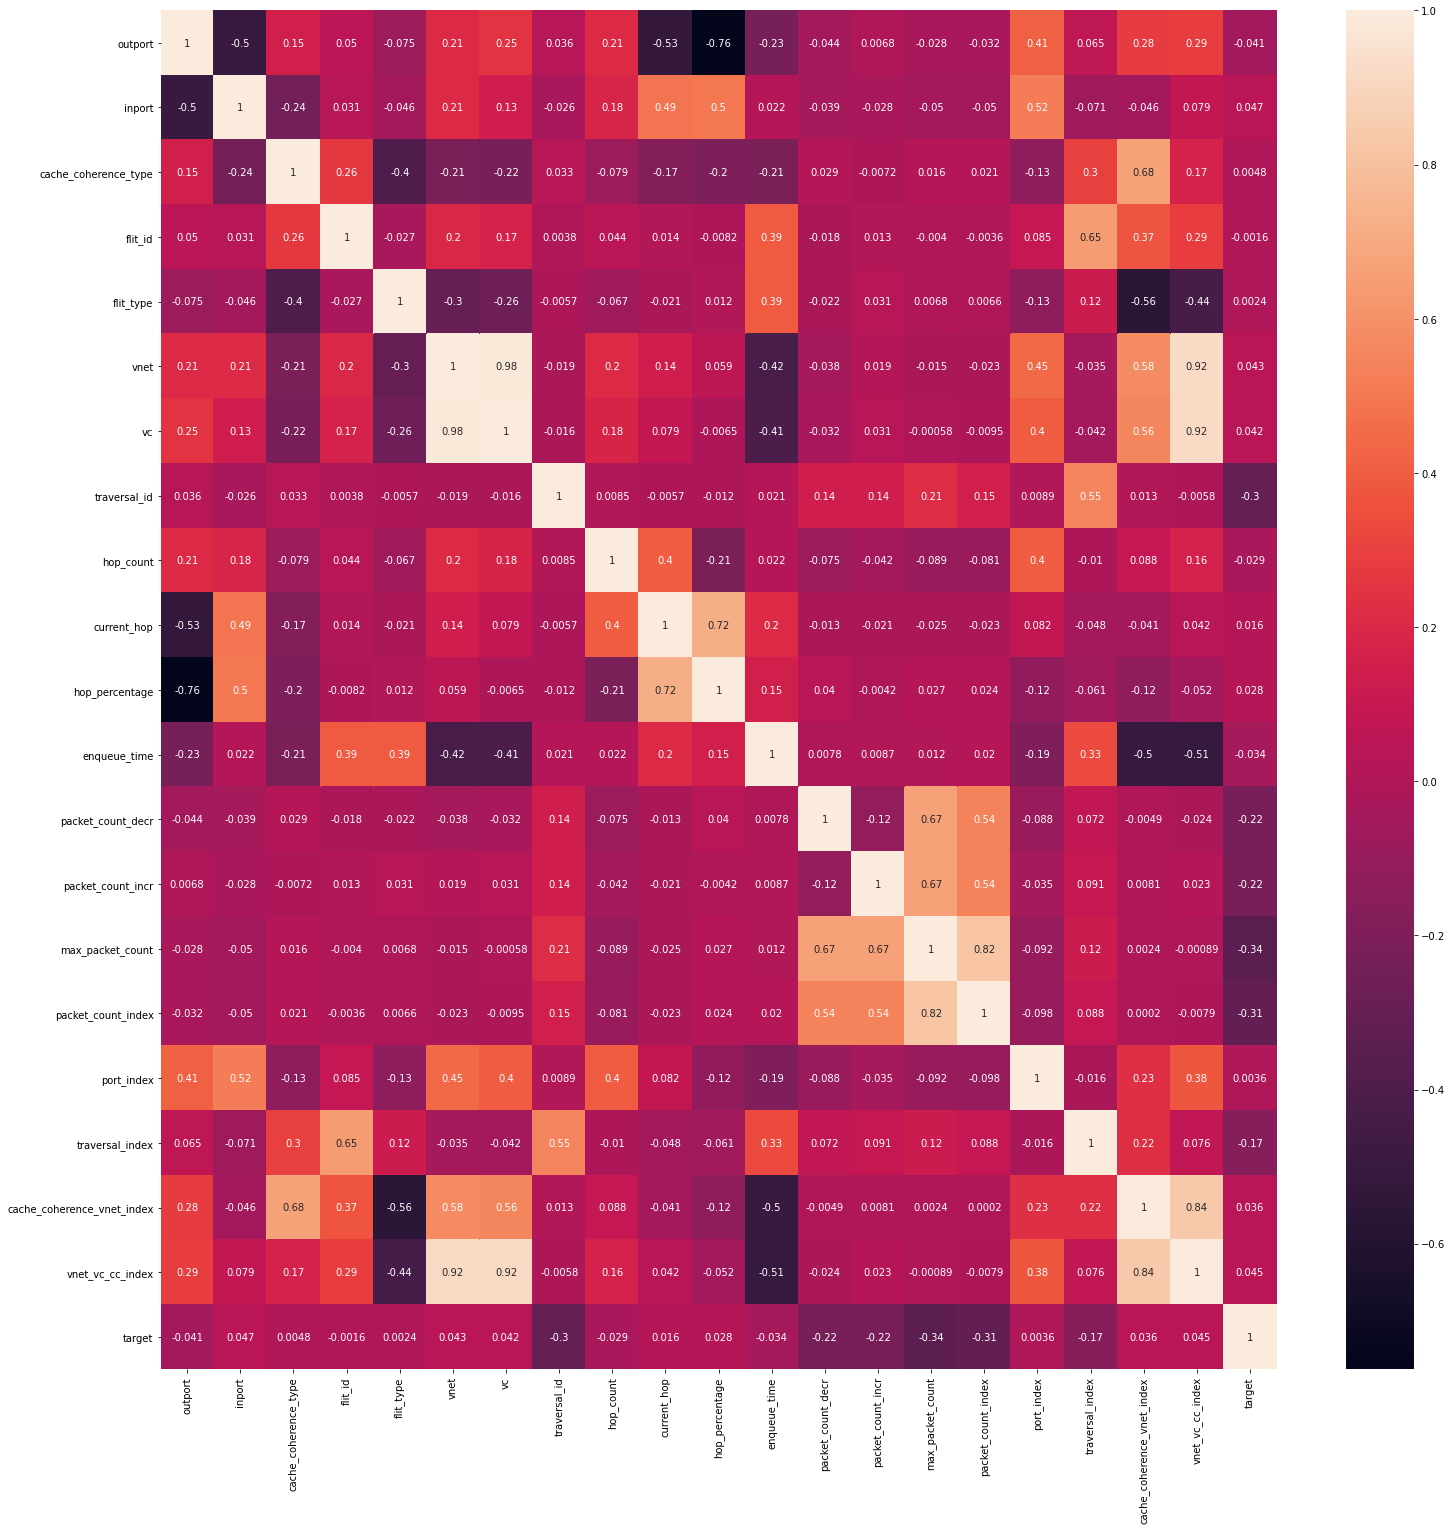

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

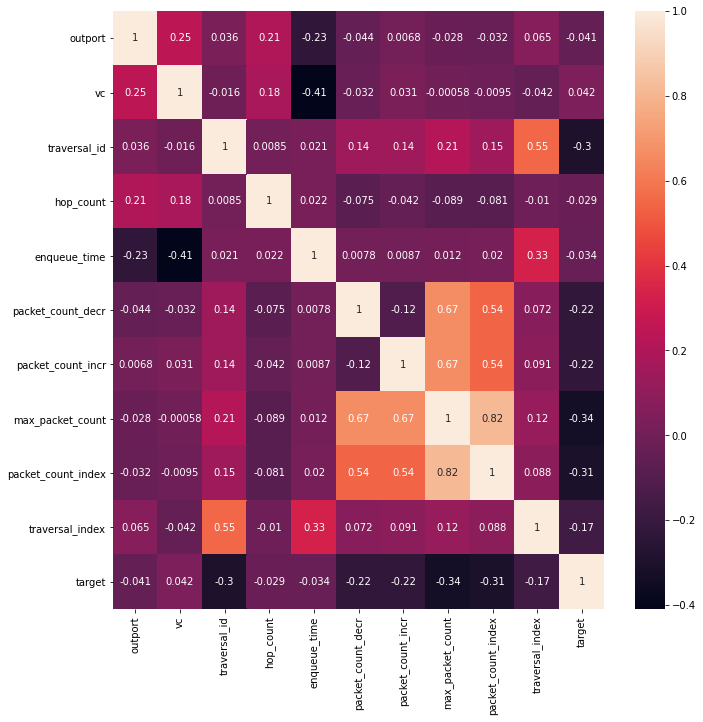

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

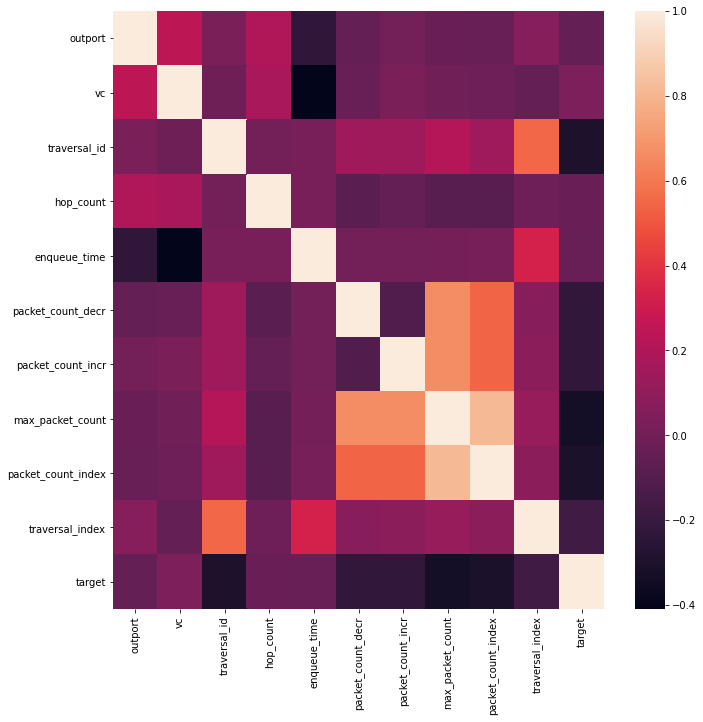

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000000,0.5,0.066667,0.235294,0.000000,0.235294,0.003889,0.000000e+00
1,0.50,0.000000,0.000017,0.5,0.066667,0.289916,0.000000,0.289916,0.004792,7.380485e-07
2,1.00,0.000000,0.000083,0.5,0.066667,0.285714,0.004202,0.289916,0.009515,3.690243e-06
3,0.75,0.888889,0.000066,0.5,0.133333,0.281513,0.008403,0.289916,0.014098,2.952194e-06
4,0.75,0.888889,0.000033,0.5,0.133333,0.231092,0.004202,0.235294,0.007709,1.476097e-06
...,...,...,...,...,...,...,...,...,...,...
221101,1.00,0.000000,0.999983,0.5,0.183333,0.016807,0.029412,0.046218,0.002709,2.666650e-01
221102,1.00,0.000000,0.999983,0.5,0.300000,0.012605,0.033613,0.046218,0.002431,3.999987e-01
221103,1.00,0.000000,0.999983,0.5,0.416667,0.008403,0.037815,0.046218,0.002014,5.333323e-01
221104,1.00,0.000000,0.999983,0.5,0.533333,0.004202,0.042017,0.046218,0.001458,1.000000e+00


In [20]:
train_X[train_X.duplicated()].shape

(12, 10)

In [21]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000000,0.5,0.066667,0.262222,0.000000,0.262222,0.004580,0.000000
1,0.75,0.888889,0.000050,0.5,0.133333,0.257778,0.004444,0.262222,0.009083,0.000002
2,0.75,0.888889,0.000050,0.5,0.150000,0.253333,0.008889,0.262222,0.013431,0.000018
3,0.75,0.888889,0.000050,0.5,0.166667,0.248889,0.013333,0.262222,0.017623,0.000028
4,0.75,0.888889,0.000050,0.5,0.183333,0.244444,0.017778,0.262222,0.021660,0.000038
...,...,...,...,...,...,...,...,...,...,...
119309,0.75,0.000000,0.999983,0.5,0.250000,0.017778,0.035556,0.053333,0.003416,0.222264
119310,0.75,0.000000,0.999983,0.5,0.366667,0.013333,0.040000,0.053333,0.003028,0.333398
119311,0.75,0.000000,0.999983,0.5,0.483333,0.008889,0.044444,0.053333,0.002484,0.444531
119312,0.75,0.000000,0.999983,0.5,0.600000,0.004444,0.048889,0.053333,0.001786,0.833499


In [22]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [24]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [25]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [27]:
train_Y = df['target']
train_Y.value_counts()

0    135496
1     85610
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
8  packet_count_index  2544.593687
7    max_packet_count  2329.155506
2        traversal_id  2286.079586
6   packet_count_incr  1172.902053
5   packet_count_decr  1156.277499
9     traversal_index   724.136766
1                  vc   136.318164
0             outport    36.055253
4        enqueue_time    21.119012
3           hop_count    13.573845


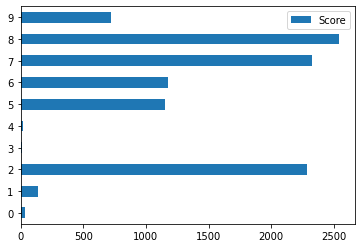

In [30]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [35]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.19726476802506
Test Prediction Score 96.73268005207977


In [36]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 81.86717401143201
Test Prediction Score 83.8488848120403
Test Prediction Score 84.69625660705235
Test Prediction Score 82.93154674354298
Test Prediction Score 80.328839307303


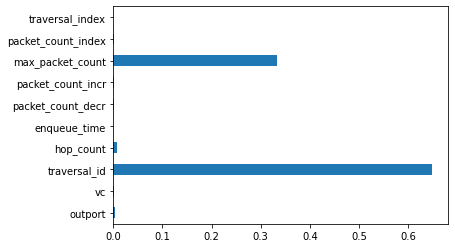

In [37]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

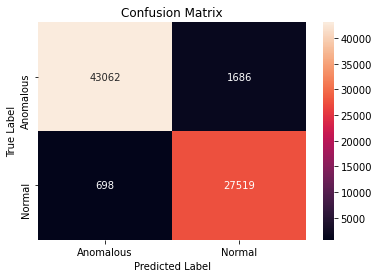

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     44748
           1       0.94      0.98      0.96     28217

    accuracy                           0.97     72965
   macro avg       0.96      0.97      0.97     72965
weighted avg       0.97      0.97      0.97     72965



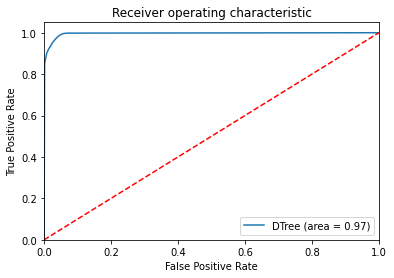

In [40]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r10l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [45]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99594980457806
Test Prediction Score 99.80675666415405


In [46]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 84.59443150007543
Test Prediction Score 85.10676247260868
Test Prediction Score 87.60842806458619
Test Prediction Score 84.7958463258222
Test Prediction Score 80.97501188123765


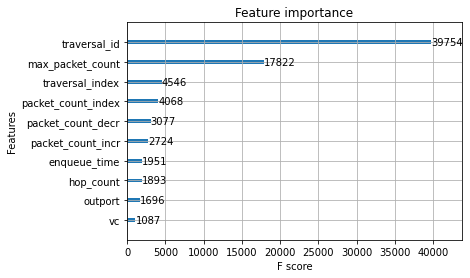

In [47]:
plot_importance(xgbc)
plt.show()

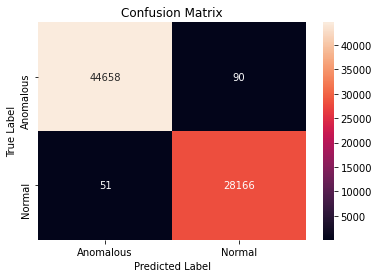

In [48]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44748
           1       1.00      1.00      1.00     28217

    accuracy                           1.00     72965
   macro avg       1.00      1.00      1.00     72965
weighted avg       1.00      1.00      1.00     72965



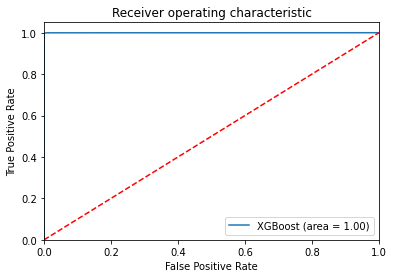

In [50]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()